#### Домашнее задание №2. по курсу Теории вероятностей и математической статистике

In [55]:
#Необходимые библиотеки:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats

##### Задачи 1 и 2: 
Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Случайная величина X задаёт число правильных ответов при простом угадывании. Найдите математическое ожидание данной случайной величины. Найдите дисперсию случайной величины X.

Подсказка: постройте закон распределения случайной величины X.

In [3]:
#Случайная величина X - количество правильных ответов при простом угадывании может принимать следующие значения:
#0,1,2,3,4,5
#Посчитаем вероятность, с которой случайная величина может принимать перечисленные значения при простом угадывании:
#p0,p1,p2,p3,p4,p5
#На каждый вопрос приведено четыре варианта ответа, значит угадать правильный ответ можно с вероятностью 1/4
#Также нам надо посчитать чему равно количество всех возможных вариантов указать ответ в серии из 5 вопросов: это 4 в 5ой степени
X = [0,1,2,3,4,5]
np.power(4,5)

1024

In [ ]:
#Случайная величина имеет биномиальное распределение - распределение количества успехов в серии из 5 незвыисимых испытаний,
#таких что вероятность угадать ответ равна 1/4. Воспользуемся формулой для подсчета соответствующих вероятностей:

In [10]:
def combinations(n: int, k: int) -> int:
    return np.math.factorial(n)/(np.math.factorial(k)*np.math.factorial(n-k))

In [11]:
p0 = combinations(5, 0)*((1/4)**0)*((3/4)**5)
p1 = combinations(5, 1)*((1/4)**1)*((3/4)**4)
p2 = combinations(5, 2)*((1/4)**2)*((3/4)**3)
p3 = combinations(5, 3)*((1/4)**3)*((3/4)**2)
p4 = combinations(5, 4)*((1/4)**4)*((3/4)**1)
p5 = combinations(5, 5)/np.power(4,5)
print(f"Закон распределения случайной величины, принимающей следующие значения [0,1,2,3,4,5]: [{p0},{p1},{p2},{p3},{p4},{p5}] ")

Закон распределения случайной величины, принимающей следующие значения [0,1,2,3,4,5]: [0.2373046875,0.3955078125,0.263671875,0.087890625,0.0146484375,0.0009765625] 


Text(0.5,1,'Биномиальное распределение случайной величины X при n = 5 и p = 1/4')

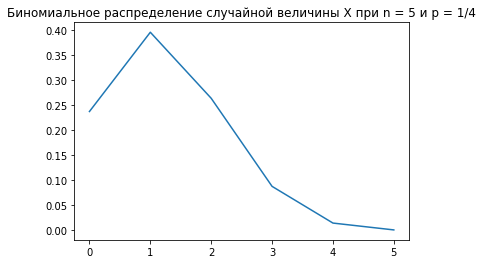

In [21]:
plt.plot( [0.2373046875,0.3955078125,0.263671875,0.087890625,0.0146484375,0.0009765625] )
plt.title('Биномиальное распределение случайной величины X при n = 5 и p = 1/4')

In [12]:
#Найдем математическое ожидание случайной величины X:
p = [0.2373046875,0.3955078125,0.263671875,0.087890625,0.0146484375,0.0009765625] 
m = np.dot(X,p)
print(f"Математическое ожидание случайной величины X равно: {m} ")

Математическое ожидание случайной величины X равно: 1.25 


In [13]:
#Найдем дисперсию случайной величины X:
m_squared = (X - m)*(X - m)
d = np.dot(m_squared,p)
print(f"Дисперсия случайной величины X равна: {d} ")

Дисперсия случайной величины X равна: 0.9375 


In [14]:
#Проверим то, что получилось с помощью известных выражений для мат. ожидания и дисперсии случайной величины, имеющей 
#биномиальный закон распределения: m = n(число вопросов)*p(вероятность случайного ответа)
m = 5*1/4
m

1.25

In [15]:
#Дисперсия: d = n*p*(1-p)
d = 5*1/4*(1-1/4)
d

0.9375

##### Задача 3: 
Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число N, такое, что с вероятностью
0.95 пользователь получит не более N писем со спамом за текущий день.

In [22]:
#Случайная величина X равная количеству полученных писем типа спам за сутки имеет распределение Пуассона с параметром lamba = 10
#Случайная величина может принимать значения 0, 1, 2, 3 и т.д. с соответствующей вероятностью Пуассона:
#p(x = k) = lambda**k * e ** (-lambda)/k_factorial
def poisson_proba(k: int, lambda_: float) -> float:
    """Формула Пуассона.
    """
    
    return (lambda_ ** k) * (np.exp(-lambda_)) / np.math.factorial(k)

In [61]:
lambda_ = 10
subtotal = 0
for i in range(1, 20):
    subtotal = subtotal + poisson_proba(k=i, lambda_=lambda_)
    if subtotal >= 0.95:
        print(f'С вероятностью {subtotal} пользователь получит не более {i} писем со спамом за текущий день')
        break

С вероятностью 0.951214196766259 пользователь получит не более 15 писем со спамом за текущий день


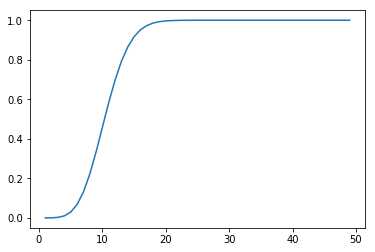

In [56]:
#Проверим получившийся ответ, нарисовав функцию распределения при lambda = 10
x = list(range(1, 50))
y = [poisson_proba(k=i, lambda_=lambda_) for i in x]
y_cum = []
i = 0
while i != len(y):
    y_cum.append(sum(y[0:i]))
    i = i + 1
plt.plot(x, y_cum)

##### Задача 4: 
Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать
чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

Подсказка: 1) "Вероятность попасть k раз при n выстрелах" - на какое распределение это похоже?
           2) А если нам нужна вероятность P(X >= k), а не P(X = k)? 3) Здесь предстоит немножко покодить.

In [60]:
#Вероятность попасть k раз при n выстрелах - это биномиальное распределение - вероятность количества успехов в серии из
#n независимых испытаний.
#p = 0.01
#q = 1-p
#X - количество попаданий
#n = серия выстрелов
#вероятность события "хотя бы 6 раз будет совершено попадание" это 1- вероятность попадания либо 1 либо 2 либо 3.....либо 6 раз
prob = 0
for n in range(6,1000):
    prob = 1 - sum(combinations(n, 0)*((0.01)**i)*((0.99)**n-i) for i in range(6))
    if prob >=0.9:
        print(f'С вероятностью {prob} мишень будет поражена хотя бы 6 раз в серии из {n} выстрелов')
        break

С вероятностью 0.9006201349367614 мишень будет поражена хотя бы 6 раз в серии из 221 выстрелов
